In [9]:
%load_ext autoreload
%autoreload 2

In [76]:
import datetime
import sys
import os
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from pprint import pprint
from typing import Dict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm

sys.path.append("../src")
sys.path.append("../scripts")

from model import RegimeSwitchingModel
from data import create_train_test_data

パス，変数，データ作成

In [77]:
# ディレクトリ
DATA_INPUT_DIR = Path("../data/input") # インプットデータディレクトリ
DATA_OUTPUT_DIR = Path("../data/output") # 出力データディレクトリ
# 分析条件
prediction_lag = 1
rolling_span = 250
# ファイル
endog_file = DATA_INPUT_DIR / "X.csv"
exog_file = DATA_INPUT_DIR / "Y.csv"
selected_factors_file = DATA_INPUT_DIR / f"Selected_Factors_Col{rolling_span}_lag{prediction_lag}.csv"

普通にMarkov Regression

$$
y_t = \mu_{S_t} + X^\prime_{t-1} \beta_{S_t} + \epsilon_{S_t}
$$

In [78]:
# データ作成
base_date = datetime.datetime(2022, 12, 8)
y_train, y_test, X_train, X_test = create_train_test_data(
    base_date,
    endog_file,
    exog_file,
    selected_factors_csv_file = selected_factors_file,
    prediction_lag = 2,
    rolling_span = rolling_span
)
# マルコフ回帰
rs = RegimeSwitchingModel(
    y_train,
    k_regimes=2,
    exog=X_train,
    trend='c',
    switching_trend=True,
    switching_exog=True,
    switching_variance=True
)
# パラメラ推定（モデル作成）
rs.fit(
    maxiter=1000,
    em_iter=1000,
    cov_type="approx",
    # method="bfgs",
    method="powell",
    search_reps=10,
    search_iter=10,
    disp=True
)
# 予測
pred = rs.forecast(X_test.to_numpy(), method="avg")

base_date: 2022-12-08 00:00:00 date_use_factor: 2022-12-07 00:00:00 date_y_train: 2022-12-07 00:00:00 date_X_train: 2022-12-05 00:00:00 date_y_test: 2022-12-08 00:00:00 date_X_test: 2022-12-06 00:00:00


/home/ryosuke/Yurukatsu/dlcds/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -2.397623
         Iterations: 1
         Function evaluations: 523


In [95]:
# データ作成
base_date = datetime.datetime(2022, 12, 8)
y_train, y_test, X_train, X_test = create_train_test_data(
    base_date,
    endog_file,
    exog_file,
    selected_factors_csv_file = selected_factors_file,
    prediction_lag = 1,
    rolling_span = rolling_span
)

base_date: 2022-12-08 00:00:00 date_use_factor: 2022-12-07 00:00:00 date_y_train: 2022-12-07 00:00:00 date_X_train: 2022-12-06 00:00:00 date_y_test: 2022-12-08 00:00:00 date_X_test: 2022-12-07 00:00:00


<AxesSubplot: xlabel='date'>

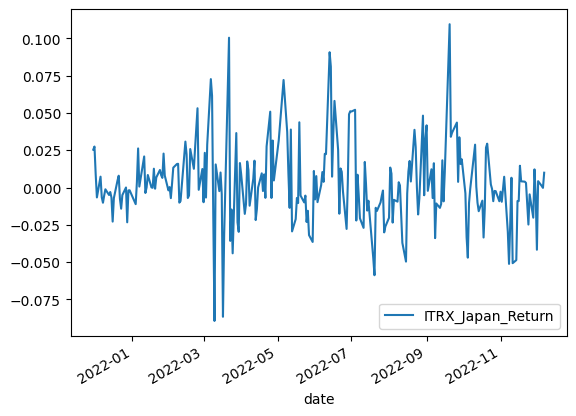

In [96]:
y_train.plot()